<a href="https://colab.research.google.com/github/LakshaySharma-2003/Customer-Segmentation/blob/main/customer_segmentaion_using_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation using Unsupervised K-means Clustering

In [1]:
#importing libraries
import numpy as np
import pandas as pd
#importing plot libraries
import matplotlib.pyplot as plt
import seaborn as sns
#importing Clustering algorithm library
from sklearn.cluster import KMeans

In [2]:
#importing dataset
data=pd.read_csv('/content/drive/MyDrive/Dataset.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
#data slicing to select the key features
dataframe=data.iloc[:,[3,4]].values
print(dataframe[:10])

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]
 [17 76]
 [18  6]
 [18 94]
 [19  3]
 [19 72]]


In [6]:
# calculating the number of clusters
# using WCSS formula (within cluster sum-up squares)
wcss_list=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i, init='k-means++',random_state=40)
  kmeans.fit(dataframe)
  #calculating the WCSS value by Kmeans inertia function
  wcss_list.append(kmeans.inertia_)

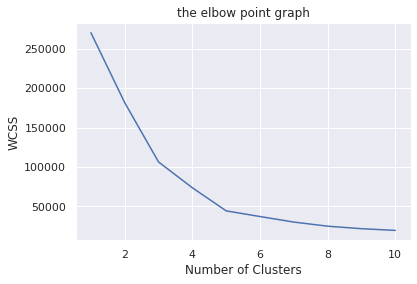

In [11]:
#ploting the graph for finding the number of clusters to be formed
sns.set()
plt.plot(range(1,11),wcss_list)
plt.title("the elbow point graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [12]:
#creating a model of KMeans clustering over 5 clusters
model = KMeans(n_clusters=5, init='k-means++', random_state=0)
#Fiting thr dataframe over the KMeans model of 5 clusters
trained = model.fit_predict(dataframe)
trained

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

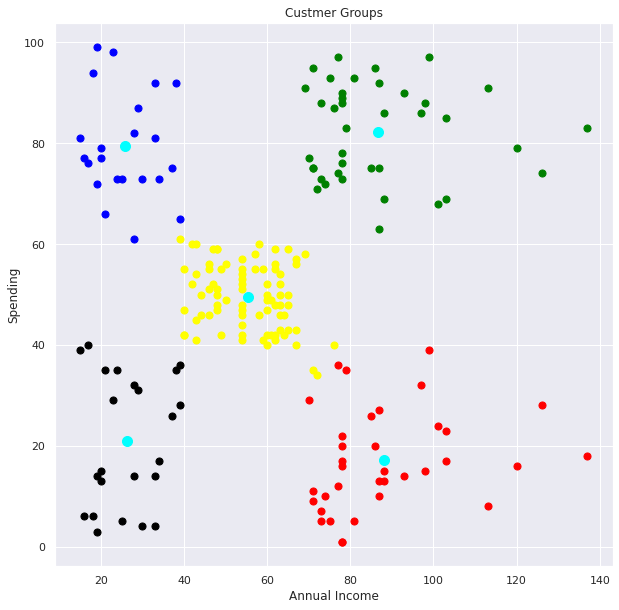

In [16]:
#plotting graph on clustered dataset
plt.figure(figsize=(10,10))
#Spliting clusters from 0 to 4 repersented by different colours
plt.scatter(dataframe[trained == 0,0], dataframe[trained == 0,1], s=50, c='red', label='Cluster 1' )
plt.scatter(dataframe[trained == 1,0], dataframe[trained == 1,1], s=50, c='yellow', label='Cluster 2' )
plt.scatter(dataframe[trained == 2,0], dataframe[trained == 2,1], s=50, c='green', label='Cluster 3' )
plt.scatter(dataframe[trained == 3,0], dataframe[trained == 3,1], s=50, c='blue', label='Cluster 4' )
plt.scatter(dataframe[trained == 4,0], dataframe[trained == 4,1], s=50, c='black', label='Cluster 5' )
#plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s = 100, c='cyan', label='Centroids')
#labels for the plot
plt.title('Custmer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending')
plt.show()